<a href="https://colab.research.google.com/github/CIC-Research/Data-Science-Project/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network
### CIC Data Science Project
By: Neidy Malaga



#### Step 1: Beginning Setup

Our project compares Product Category and Marital Status over Purchase. We start by using pandas to read our data from an Excel file and display it to prove it was read well.

In [81]:
import pandas as pd

Walmart_Data = pd.read_csv('walmart.csv')
Walmart_Data['Occupation'] = Walmart_Data['Occupation'].astype('uint8')
Walmart_Data['Purchase'] = Walmart_Data['Purchase'].astype('uint16')
Walmart_Data['Gender'] = Walmart_Data['Gender'].map({'M': 0, 'F': 1})
Walmart_Data['Stay_In_Current_City_Years'] = Walmart_Data['Stay_In_Current_City_Years'].map({'0':0, '1': 1, '2':2, '3':3,'4+': 4})


Occupation_Over_Purchase = pd.DataFrame({'Product_Category': Walmart_Data['Product_Category'],'Purchase': Walmart_Data['Purchase']})
Gender_Over_Purchase = pd.DataFrame({'Gender': Walmart_Data['Gender'], 'Purchase': Walmart_Data['Purchase']})

Walmart_Data.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,1,0-17,10,A,2,0,3,8370
1,1000001,P00248942,1,0-17,10,A,2,0,1,15200
2,1000001,P00087842,1,0-17,10,A,2,0,12,1422
3,1000001,P00085442,1,0-17,10,A,2,0,12,1057
4,1000002,P00285442,0,55+,16,C,4,0,8,7969


#### Step 2: Scatterplot Visual
Let's start by showing the scatterplot to identify the independent and dependent variable. Since we are trying to measure Product Category and Marital Status over Purchases. Purchases will be the response variable (y-val) and Product Category and Marital Status will be the explanatory variable (x-val).

The following code block will show the scatterplot. Based on the scatterplot, we can see that it has a few outliers and that most of the data is 'clustered' to the bottom. We can imply that 2-3 clusters can cover the data, and use this information to confirm our methods in Step 3 when we perform a cluster.


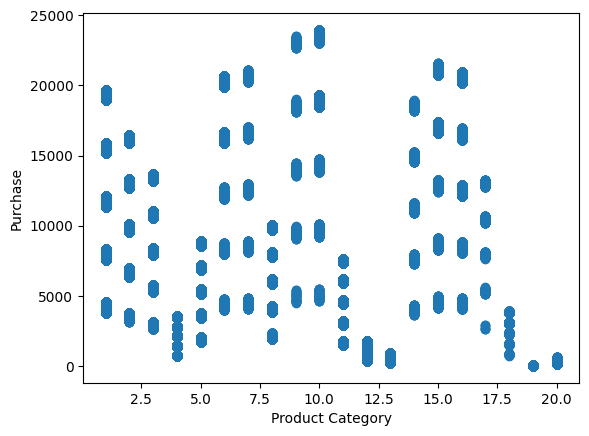

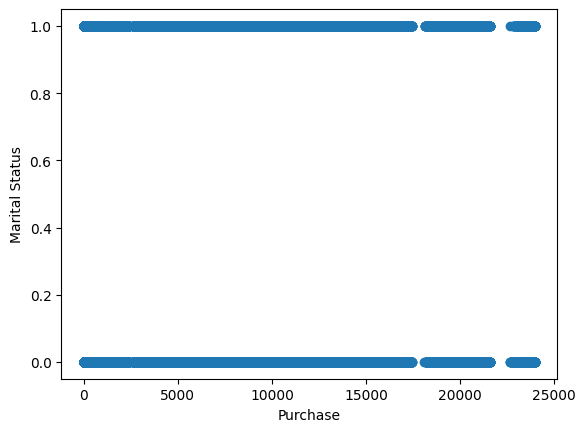

In [2]:
import matplotlib.pyplot as plt

#create scatterplot, annotate scatterplot, show scatterplot
plt.scatter(Product_Over_Purchase['Product_Category'], Product_Over_Purchase['Purchase'])
plt.xlabel('Product Category')
plt.ylabel('Purchase')
plt.show()

plt.scatter(Marital_Over_Purchase['Purchase'], Marital_Over_Purchase['Marital_Status'])
plt.xlabel('Purchase')
plt.ylabel('Marital Status')
plt.show()




#### Step 3: Clustering Data
In order to cluster data, we will use K-Means algorithm.

Credit: https://www.w3schools.com/python/python_ml_k-means.asp

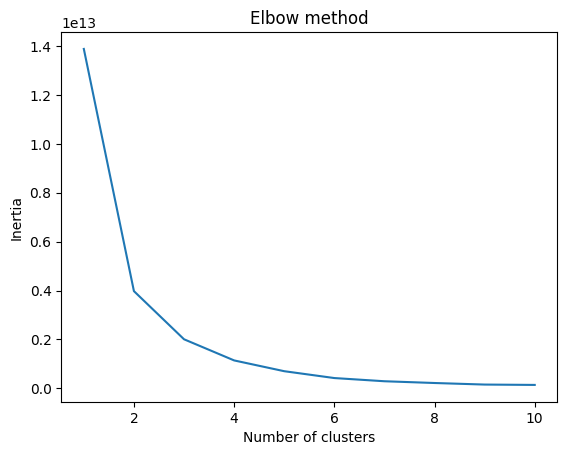

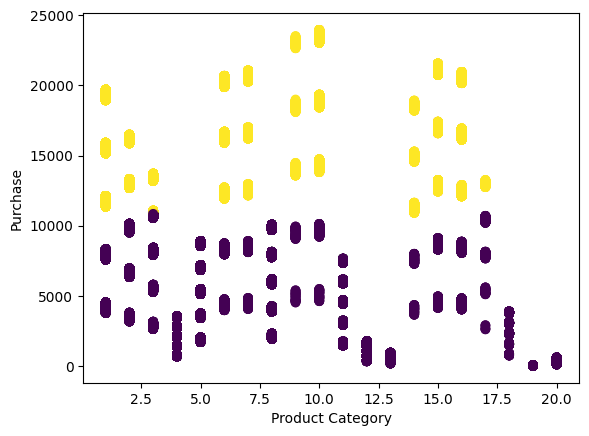

In [6]:
from sklearn.cluster import KMeans

#Elbow Method
inertia = []

for index in range(1,11):
    kmeans = KMeans(n_clusters=index)
    kmeans.fit(Product_Over_Purchase)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,11), inertia)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#KMeans
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(Product_Over_Purchase)

plt.scatter(Product_Over_Purchase['Product_Category'], Product_Over_Purchase['Purchase'], c=kmeans.labels_)
plt.xlabel('Product Category')
plt.ylabel('Purchase')
plt.show()


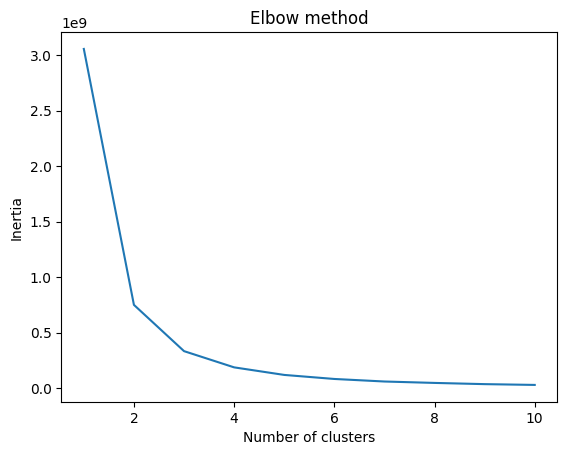

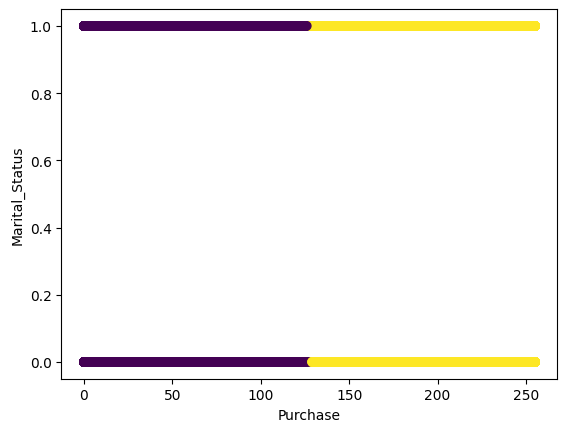

In [18]:
#Elbow Method
inertia.clear()

for index in range(1,11):
    kmeans = KMeans(n_clusters=index)
    kmeans.fit(Marital_Over_Purchase)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,11), inertia)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#KMeans
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(Marital_Over_Purchase)

plt.scatter(Marital_Over_Purchase['Purchase'], Marital_Over_Purchase['Marital_Status'], c=kmeans.labels_)
plt.xlabel('Purchase')
plt.ylabel('Marital Status')
plt.show()


#### Step 3: Classification

Random Forest should be correct: validation and training accuracy are close and high values 

In [3]:
# y = Product_Over_Purchase['Purchase']
# print(y.value_counts())


# # Mean and Standard Deviation of training scores 
# mean_training = np.mean(train_scores, axis=1) 
# Standard_Deviation_training = np.std(train_scores, axis=1) 
#   
# # Mean and Standard Deviation of testing scores 
# mean_testing = np.mean(testing_scores, axis=1) 
# Standard_Deviation_testing = np.std(testing_scores, axis=1) 
#   
# # dotted blue line is for training scores and green line is for cross-validation score 
# plt.plot(train_sizes, mean_training, '--', color="b",  label="Training score") 
# plt.plot(train_sizes, mean_testing, color="g", label="Cross-validation score") 
#   
# # Drawing plot 
# plt.title("LEARNING CURVE FOR KNN Classifier") 
# plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best") 
# plt.tight_layout() 
# plt.show()





# train_vals = []
# test_vals = []
# for i in range (1, 15):
#     rf = RandomForestClassifier(max_depth= i)
#     rf.fit(X_train, Y_train)
#     train_vals.append(mean_squared_error(Y_train, rf.predict(X_train)))
#     test_vals.append(mean_squared_error(Y_test, rf.predict(X_test)))
    
    
# ValidationCurveDisplay.from_estimator(SVC(kernel='linear'), x, y, param_name='C', param_range=np.logspace(-2, 0, 5))    

    
# plt.plot(range(1, 15), train_vals)
# plt.plot(range(1, 15), test_vals, color='red')
# plt.legend()
# plt.show()




In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

x = Walmart_Data[['Occupation']]
y = Walmart_Data['Purchase']

#splits into 80% training and 20% testing, n_
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2)
dt = RandomForestClassifier()

dt.fit(x,y)


RandomForestClassifier()

In [93]:
batch_size = int(X_train.shape[0]/1000)
x_train_pred = []
for start in range(0, X_train.shape[0], batch_size):
    end = start + batch_size
    if(end > X_train.shape[0]):
         end = X_train.shape[0]
    x_train_pred.extend(dt.predict(X_train[start:end]))
  
print('Training Accuracy : ', 
      metrics.accuracy_score(Y_train,x_train_pred)*100)

KeyboardInterrupt: 

In [85]:
from sklearn.model_selection import LearningCurveDisplay, learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=lr, X= x, y= y, cv = 5, train_sizes=[0.1, 0.33, 0.55, 0.78, 1.])
LC_plt = LearningCurveDisplay(train_sizes = train_sizes, train_scores = train_scores, test_scores = test_scores, score_name='Accuracy')
LC_plt.plot()

C:\Users\neidy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


KeyboardInterrupt: 

In [12]:
batch_size = int(X_train.shape[0]/1000)
x_train_pred = []
for start in range(0, X_train.shape[0], batch_size):
    end = start + batch_size
    if(end > X_train.shape[0]):
         end = X_train.shape[0]
    rf.predict(X_train[start:end])
  
print('Training Accuracy : ', 
      metrics.accuracy_score(Y_train,x_train_pred)*100)


KeyboardInterrupt: 

In [ ]:
x_test_pred = []
for start in range(0, X_test.shape[0], batch_size):
    end = min(start + batch_size, X_test.shape[0])
    batch_pred = rf.predict(X_test[start:end])
    x_test_pred.extend(batch_pred)
    
print('Validation Accuracy : ', 
      metrics.accuracy_score(Y_test, x_test_pred)*100)

In [23]:
from sklearn.model_selection import LearningCurveDisplay, learning_curve, StratifiedKFold, cross_validate

# cv1 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


train_sizes, train_scores, test_scores = learning_curve(estimator=rf, X= x, y= y, cv=cross_validate(rf,x,y), scoring='accuracy', train_sizes=[0.1, 0.33, 0.55, 0.78, 1.], n_jobs=-1)
LC_plt = LearningCurveDisplay(train_sizes = train_sizes, train_scores = train_scores, test_scores = test_scores, score_name='Learning Curve')

print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', test_scores)

C:\Users\neidy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\neidy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\neidy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\neidy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 455, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\

KeyboardInterrupt: 

In [10]:
from sklearn.model_selection import cross_validate
cv = cross_validate(rf,x,y, return_train_score=True)

C:\Users\neidy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


KeyboardInterrupt: 

In [24]:
cv

{'fit_time': array([45.66662216, 47.72478533, 44.28245163, 43.37768197, 44.98459077]),
 'score_time': array([11.19774556, 11.07707715, 11.36523557, 10.97926283, 10.91974354]),
 'test_score': array([0.86589889, 0.85420946, 0.88136964, 0.85077218, 0.84317308]),
 'train_score': array([0.86588919, 0.85419062, 0.88138728, 0.85078229, 0.84317642])}

https://www.geeksforgeeks.org/understanding-logistic-regression/

Logistic Regression
Fixed :)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


y =  Gender_Over_Purchase['Gender']
x = Gender_Over_Purchase.drop('Gender',axis=1)


X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

lr = LogisticRegression()
lr.fit(X_train, Y_train)

  
print('Training Accuracy : ', 
      metrics.accuracy_score(Y_train,rf.predict(X_train))*100)
print('Validation Accuracy : ', 
      metrics.accuracy_score(Y_test,rf.predict(X_test))*100)


Training Accuracy :  75.3123480300145
Validation Accuracy :  75.30314323631538


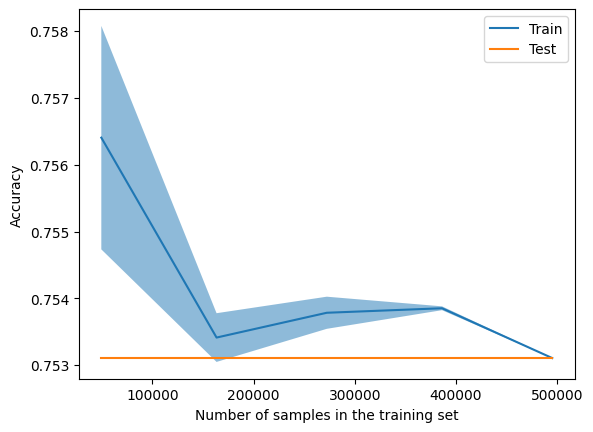

In [52]:
from sklearn.model_selection import LearningCurveDisplay, learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=lr, X= x, y= y, cv = 10, train_sizes=[0.1, 0.33, 0.55, 0.78, 1.])
LC_plt = LearningCurveDisplay(train_sizes = train_sizes, train_scores = train_scores, test_scores = test_scores, score_name='Accuracy')
LC_plt.plot()